####Importing libraries

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !cp "gdrive/My Drive/assignments" -r saved_models/


In [2]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

####Training Parameters

In [3]:
batch_size = 256
num_classes = 10
epochs = 150
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
template = 'keras_cifar10_trained_model{}.h5'
model_names = [template.format(x) for x in range(1, 10)]

####Importing dataset

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_val = x_train[:10000]
y_val = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


####Initialising all the models

In [5]:
models = [0] * 9
models[0] = keras.Sequential([
    Conv2D(32, (5, 5), input_shape=x_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
print (models[0].summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [6]:
models[1] = keras.Sequential([
    Conv2D(32, (5, 5), input_shape=x_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
print (models[1].summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [7]:
models[2] = keras.Sequential([
    Conv2D(32, (3, 3), input_shape=x_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
print (models[2].summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [8]:
models[3] = keras.Sequential([
    Conv2D(32, (3, 3), input_shape=x_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
print (models[3].summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

####Compiling the models

In [9]:
opt = keras.optimizers.Adam(1e-4)
for i in range(4):
    models[i].compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

####Creating callbacks

We have created a custom callback object which saves history and total training time as a pickle dump at end of every epoch, so when we restore a checkpoint we restore the history and total training time as well.

In [10]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History
opt = keras.optimizers.Adam(1e-4)
hist_temp = 'keras_cifar10_history{}.pkl'
hist_names = [hist_temp.format(x) for x in range(1, 10)]
early_stop = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
history_callback = keras.callbacks.History    
            
class ModelCheckpointEnhanced(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        # Added arguments
        self.callbacks_filepath = kwargs.pop('callbacks_filepath')
        self.old_time = kwargs.pop('old_time')
        self.start_time = time.time()
        self.history = kwargs.pop('history') or {}
        self.total_time = 0
        # self.epoch = []
        super().__init__(*args, **kwargs)

    def on_epoch_end(self, epoch, logs=None):
        # Run normal flow:
        super().on_epoch_end(epoch,logs)
        logs = logs or {}
        # self.epoch.append(epoch)
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        # If a checkpoint was saved, save also the callback
        filepath = self.callbacks_filepath.format(epoch=epoch + 1, **logs)
        if self.epochs_since_last_save == 0:
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current == self.best:
                    # Note, there might be some cases where the last statement will save on unwanted epochs.
                    # However, in the usual case where your monitoring value space is continuous this is not likely
                    self.total_time = time.time() - self.start_time + self.old_time
                    save_history(filepath, self.history, self.total_time)
            else:
                self.total_time = time.time() - self.start_time + self.old_time
                save_history(filepath, self.history, self.total_time)
        

####Training and evaluating 1st 4 models.

In [11]:
import time
import pickle
import matplotlib.pyplot as plt

def save_history (hist_path, history, total_time):
    print ('Saving history at', hist_path, flush=True)
    file_object = open (hist_path, 'wb')
    pickle.dump (history, file_object)
    pickle.dump (total_time, file_object)
    file_object.close()
    
def load_history (hist_path):
    print ('Loading history from', hist_path, flush=True)
    file_object = open(hist_path, 'rb')
    history = pickle.load(file_object)
    total_time = pickle.load(file_object)
    file_object.close()
    return history, total_time
             
def process_history (prev_history, current_history):
    for (k, v) in current_history.items():
        if prev_history is not None:
            v = prev_history[k] + v
    return current_history

def plot_history (history):
    epochs = range(1, len(history['val_accuracy']) + 1)
    plt.plot (epochs, history['val_accuracy'])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(len(epochs))
    plt.show()

def train_and_evaluate(model_id, use_saved):
    print ('Current model = {}'.format(model_id + 1))
    model = models[model_id]
    model_path = os.path.join(save_dir, model_names[model_id])
    hist_path = os.path.join(save_dir, hist_names[model_id])
    filename = "weights-improvement-{epoch:03d}-.hdf5"
    ckdir = os.path.join('checkpoints', '%d' % (model_id + 1))
    if not os.path.isdir(ckdir):
        os.makedirs(ckdir)
    
    filepath = os.path.join (ckdir, filename)
    callbacks_filepath = os.path.join(ckdir, 'Historycallback.{epoch:03d}.pkl')
    initial_epoch = 0
    prev_time = 0
    prev_history = None
    cklist_full = os.listdir(ckdir)
    cklist = []
    histlist = []
    if cklist_full :
        cklist = [x for x in cklist_full if x[0] == 'w']
        histlist = [x for x in cklist_full if x[0] == 'H']
        cklist.sort()
        cklist.pop()
        histlist.pop()
    if len(cklist) > len(histlist):
        cklist.pop()
    if use_saved:
        if os.path.exists(model_path):
            model = keras.models.load_model(model_path)
            history, total_time = load_history(hist_path)
            print ('Trained model loaded from {}', model_path)
            loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
            print ('Time taken for model {} = {}'.format(model_id + 1, total_time))
            print ('Loss = {}, Accuracy = {}'.format(loss, accuracy))
            return history, loss, accuracy, total_time
        elif cklist:
            ckpath = os.path.join(ckdir, cklist[-1])
            initial_epoch = [int(s) for s in cklist[-1].split('-') if s.isdigit()][0]
            print ('initial_epoch = %d' % initial_epoch, flush=True)
            model = keras.models.load_model(ckpath)
            print ('Loaded checkpoint {} from {}'.format(initial_epoch, ckpath))
            prev_history, prev_time = load_history(callbacks_filepath.format(epoch = initial_epoch))
    
    checkpoint = ModelCheckpointEnhanced(filepath, verbose=1, monitor='val_loss',
                                         callbacks_to_save=history_callback, 
                                         callbacks_filepath=callbacks_filepath,
                                         old_time=prev_time, history = prev_history
                                         )        
    callbacks_list = [early_stop, checkpoint]
    model.fit(x_train, y_train, batch_size=batch_size, 
                        initial_epoch = initial_epoch,
                        epochs=epochs, validation_data=(x_val, y_val), workers=4, 
                        shuffle=True, callbacks=callbacks_list)
    
    history = checkpoint.history
    total_time = checkpoint.total_time
    
    print ('Time taken for model {} = {}'.format(model_id + 1, total_time))
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print ('Loss = {}, Accuracy = {}'.format(loss, accuracy))
    history = process_history (prev_history, history)
    model.save(model_path)
    save_history(hist_path, history, total_time)
    print('Saved trained model at %s ' % model_path)
    return history, loss, accuracy, total_time

In [12]:
history_list = [0] * 9
training_data = [0] * 9

for i in range (4):
    history, loss, accuracy, time_taken = train_and_evaluate(i, use_saved=True)
    history_list[i] = history
    data_dict = {'test_accuracy':accuracy, 
                 'train_accuracy':history['acc'][-1],
                 'val_accuracy':history['val_acc'][-1],
                 'time_taken':time_taken}
    training_data[i] = data_dict
    

Current model = 1


W1030 04:47:39.034080 140341109086016 deprecation.py:323] From /home/satvik/miniconda3/envs/ai/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history1.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model1.h5
Time taken for model 1 = 513.2500762939453
Loss = 0.9784036623001099, Accuracy = 0.6735000014305115
Current model = 2


W1030 04:47:42.923238 140341109086016 hdf5_format.py:192] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history2.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model2.h5
Time taken for model 2 = 430.4620542526245
Loss = 1.1456246612548828, Accuracy = 0.6026999950408936
Current model = 3


W1030 04:47:45.412878 140341109086016 hdf5_format.py:192] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history3.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model3.h5
Time taken for model 3 = 466.3982617855072
Loss = 0.9540680889129639, Accuracy = 0.6826000213623047
Current model = 4


W1030 04:47:48.172277 140341109086016 hdf5_format.py:192] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history4.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model4.h5
Time taken for model 4 = 559.3223905563354
Loss = 0.9657705348968506, Accuracy = 0.6732000112533569


In [13]:
for i in range (4):
    print ('Model:', i + 1)
    print (training_data[i])

Model: 1
{'test_accuracy': 0.6735, 'train_accuracy': 0.77345, 'val_accuracy': 0.678, 'time_taken': 513.2500762939453}
Model: 2
{'test_accuracy': 0.6027, 'train_accuracy': 0.667925, 'val_accuracy': 0.6108, 'time_taken': 430.4620542526245}
Model: 3
{'test_accuracy': 0.6826, 'train_accuracy': 0.7723, 'val_accuracy': 0.6849, 'time_taken': 466.3982617855072}
Model: 4
{'test_accuracy': 0.6732, 'train_accuracy': 0.779275, 'val_accuracy': 0.6787, 'time_taken': 559.3223905563354}


Model 3 is clearly the best. It has best results in terms of accuracy and 2nd best in terms of time taken for training.

####Creating models 5 to 7

In [14]:
models[4] = keras.Sequential([
    Conv2D(32, (3, 3), input_shape=x_train.shape[1:], strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
print (models[4].summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [15]:
models[5] = keras.Sequential([
    Conv2D(32, (3, 3), input_shape=x_train.shape[1:], padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
print (models[5].summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [16]:
models[6] = keras.Sequential([
    Conv2D(32, (3, 3), input_shape=x_train.shape[1:], strides=(2, 2), 
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
print (models[6].summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

####Compiling models and running training code.

In [17]:
for i in range(4, 7):
    models[i].compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [18]:
for i in range (4, 7):
    history, loss, accuracy, time_taken = train_and_evaluate(i, use_saved=True)
    history_list[i] = history
    data_dict = {'test_accuracy':accuracy, 
                 'train_accuracy':history['acc'][-1],
                 'val_accuracy':history['val_acc'][-1],
                 'time_taken':time_taken}
    training_data[i] = data_dict
    

Current model = 5
Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history5.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model5.h5
Time taken for model 5 = 352.6837821006775
Loss = 1.4079483251571656, Accuracy = 0.501800000667572
Current model = 6


W1030 04:47:54.007831 140341109086016 hdf5_format.py:192] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history6.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model6.h5
Time taken for model 6 = 543.9529900550842
Loss = 0.9292564040184021, Accuracy = 0.6847000122070312
Current model = 7


W1030 04:47:57.502502 140341109086016 hdf5_format.py:192] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history7.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model7.h5
Time taken for model 7 = 384.24038767814636
Loss = 1.1158162803649903, Accuracy = 0.6057999730110168


In [19]:
for i in range (0, 7):
    print ('Model:', i + 1)
    print (training_data[i])

Model: 1
{'test_accuracy': 0.6735, 'train_accuracy': 0.77345, 'val_accuracy': 0.678, 'time_taken': 513.2500762939453}
Model: 2
{'test_accuracy': 0.6027, 'train_accuracy': 0.667925, 'val_accuracy': 0.6108, 'time_taken': 430.4620542526245}
Model: 3
{'test_accuracy': 0.6826, 'train_accuracy': 0.7723, 'val_accuracy': 0.6849, 'time_taken': 466.3982617855072}
Model: 4
{'test_accuracy': 0.6732, 'train_accuracy': 0.779275, 'val_accuracy': 0.6787, 'time_taken': 559.3223905563354}
Model: 5
{'test_accuracy': 0.5018, 'train_accuracy': 0.53325, 'val_accuracy': 0.5059, 'time_taken': 352.6837821006775}
Model: 6
{'test_accuracy': 0.6847, 'train_accuracy': 0.797175, 'val_accuracy': 0.6915, 'time_taken': 543.9529900550842}
Model: 7
{'test_accuracy': 0.6058, 'train_accuracy': 0.645625, 'val_accuracy': 0.6114, 'time_taken': 384.24038767814636}


Model 6 is the best in terms of test accuracy.

In [20]:
models[7] = keras.Sequential([
    Conv2D(32, (3, 3), input_shape=x_train.shape[1:], padding='same', activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(num_classes, activation='softmax')
])
print (models[7].summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [21]:
models[8] = keras.Sequential([
    Conv2D(32, (3, 3), input_shape=x_train.shape[1:], padding='same', activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='sigmoid'),
    Dense(num_classes, activation='softmax')
])
print (models[8].summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [22]:
for i in range(7, 9):
    models[i].compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [23]:
for i in range (7, 9):
    history, loss, accuracy, time_taken = train_and_evaluate(i, use_saved=True)
    history_list[i] = history
    data_dict = {'test_accuracy':accuracy, 
                 'train_accuracy':history['acc'][-1],
                 'val_accuracy':history['val_acc'][-1],
                 'time_taken':time_taken}
    training_data[i] = data_dict
    

Current model = 8
Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history8.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model8.h5
Time taken for model 8 = 534.3603522777557
Loss = 1.0328333101272582, Accuracy = 0.6794999837875366
Current model = 9


W1030 04:48:03.486127 140341109086016 hdf5_format.py:192] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


Loading history from /home/satvik/Downloads/saved_models/keras_cifar10_history9.pkl
Trained model loaded from {} /home/satvik/Downloads/saved_models/keras_cifar10_trained_model9.h5
Time taken for model 9 = 538.8325986862183
Loss = 1.2939143756866456, Accuracy = 0.5375000238418579


In [24]:
import numpy as np
from tensorflow.python.util import object_identity
def count_params(weights):
    return int(sum(np.prod(p.shape.as_list())
      for p in object_identity.ObjectIdentitySet(weights)))

for i in range (0, 9):
    trainable_count = count_params(models[i].trainable_weights)
    training_data[i]['trainable_params'] = trainable_count


In [25]:
import pandas as pd
df = pd.DataFrame(training_data)
df.index = np.arange(1, len(df)+1)
print (df)

   test_accuracy  train_accuracy  val_accuracy  time_taken  trainable_params
1         0.6735        0.773450        0.6780  513.250076            156810
2         0.6027        0.667925        0.6108  430.462054             58506
3         0.6826        0.772300        0.6849  466.398262            167562
4         0.6732        0.779275        0.6787  559.322391            126730
5         0.5018        0.533250        0.5059  352.683782             24202
6         0.6847        0.797175        0.6915  543.952990            282250
7         0.6058        0.645625        0.6114  384.240388             36490
8         0.6795        0.918725        0.6817  534.360352            282250
9         0.5375        0.563650        0.5427  538.832599            282250


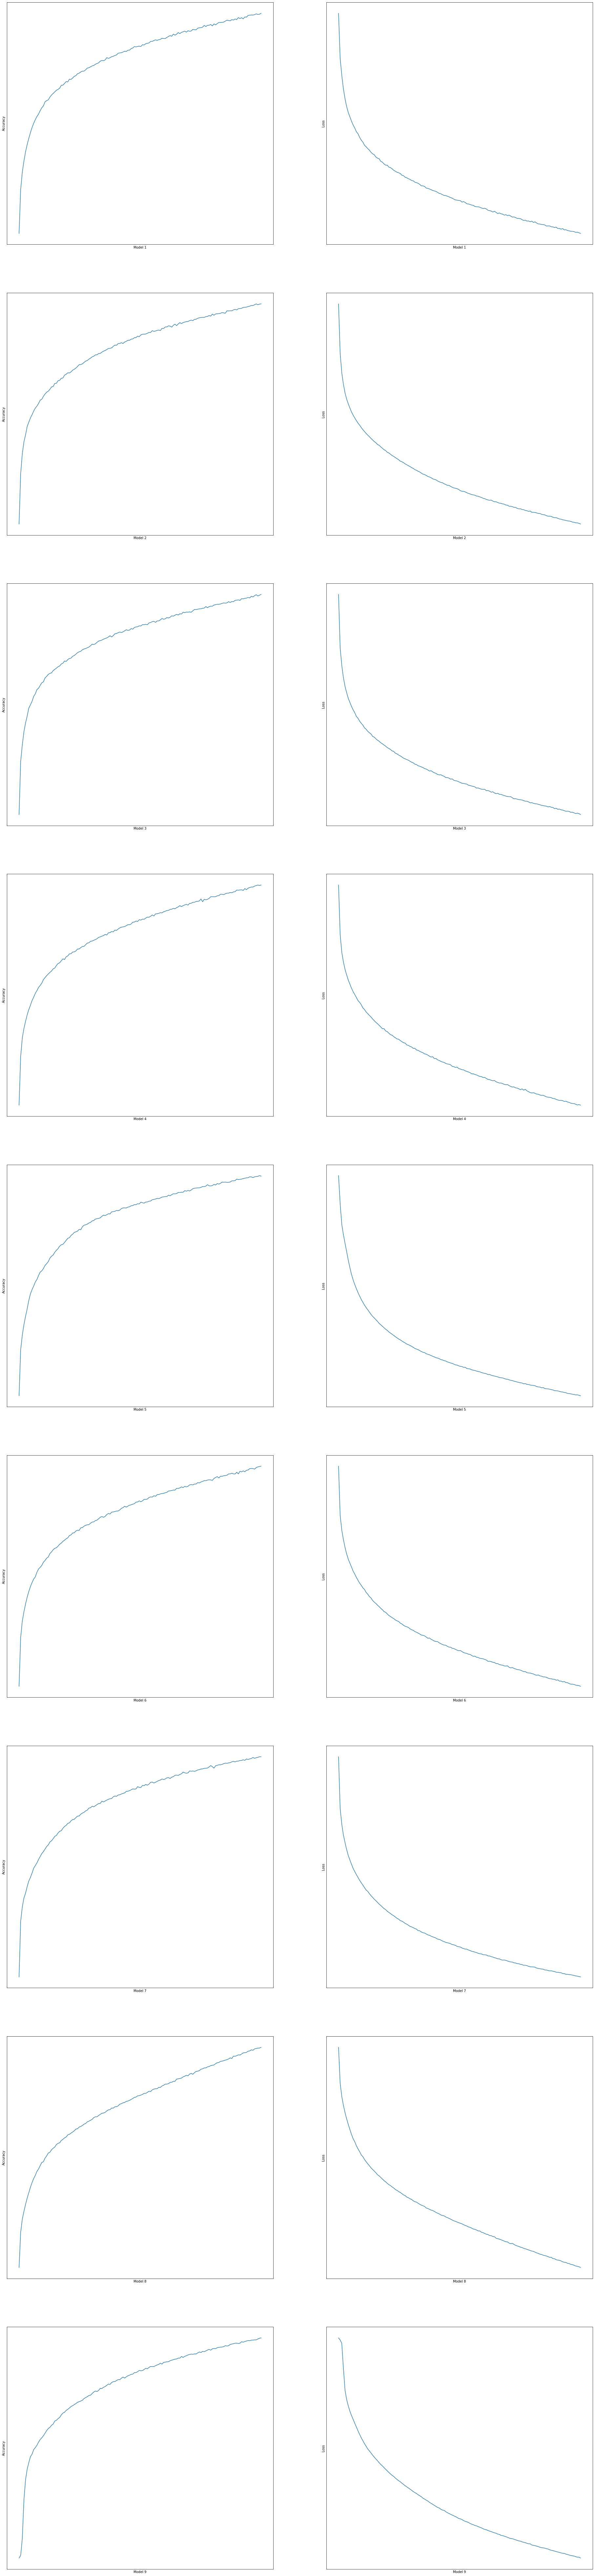

In [28]:
plt.figure(figsize=(32,144))
for i in range (0, 9):
    plt.subplot(9, 2, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.plot(range(1, len(history_list[i]['acc']) + 1), history_list[i]['acc'])
    plt.ylabel('Accuracy', fontsize=10)
    plt.xlabel('Model ' + str(i + 1), fontsize=10)
    plt.subplot(9, 2, 2*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.plot(range(1, len(history_list[i]['loss']) + 1), history_list[i]['loss'])
    plt.ylabel('Loss')
    plt.xlabel('Model ' + str(i + 1))
plt.show()

In [27]:
# !cp -r saved_models "gdrive/My Drive/assignments"